In [1]:
import umap
import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

###   t-SNE, UMAP and LargeVis

In this and the next notebook we will use manifold learning for data visualization of large data sets (with high dimensionality). In addition to t-SNE, two relatively new methods will be used that are more efficient on large data sets.


- UMAP (Uniform Manifold Approximation and Projection) - Install this Python package: https://umap-learn.readthedocs.io/en/latest/index.html. UMAP package is compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. UMAP can work as a drop in replacement for t-SNE and other dimension reduction classes from scikit-learn


- LargeVis (Visualizing Large-scale and High-dimensional Data) - Many techniques (like t-SNE, UMAP and LargeVis) first compute a similarity structure of the data points and then project them into a low-dimensional space with the structure preserved. These two steps suffer from considerable computational costs Comparing to tSNE, LargeVis significantly reduces the computational cost of the graph construction step and employs a principled probabilistic model for the visualization step, the objective of which can be effectively optimized through asynchronous stochastic gradient descent with a linear time complexity. Download this algorithm repository and follow the installation instructions. https://github.com/lferry007/LargeVis


In [2]:
from sklearn.manifold import TSNE
import umap

To get data we use the sklearn.datasets.fetch_openml method, which as the name requires, Fetch dataset from openml by name or dataset id. We will use MNIST and Fashion-MNIST(Zalando's article images). Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Instead of numbers it contains thumbnails of clothes images.

In [3]:
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

Below are drawings of some samples from mnist and fmnist data sets

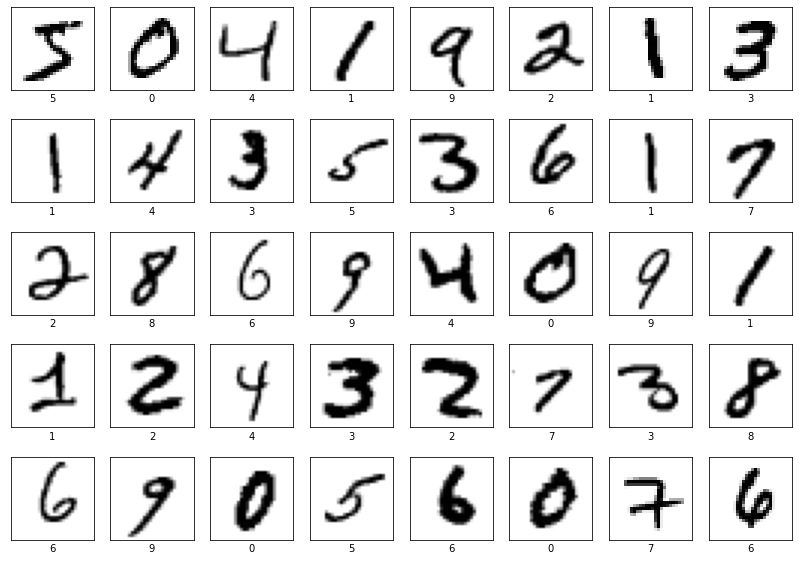

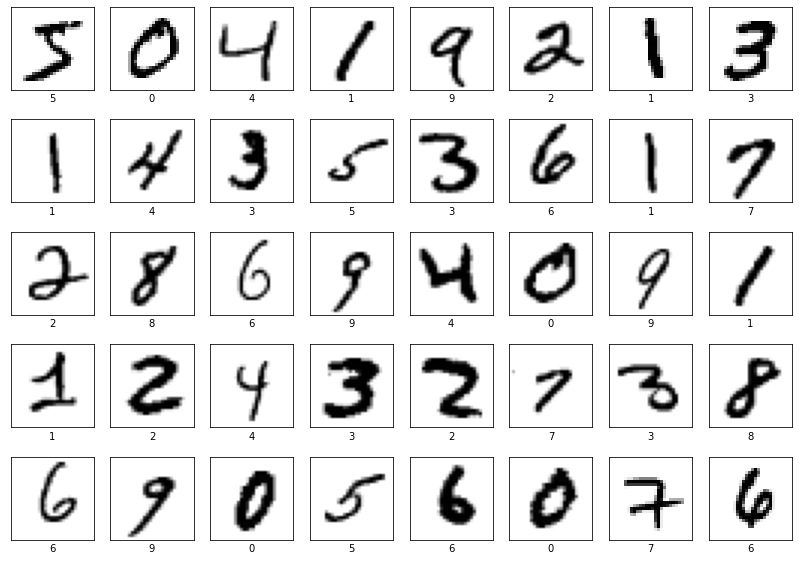

In [5]:
mnist_names = [i for i in range(10)]

plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist.data.iloc[i].to_numpy().reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(mnist_names[int(mnist.target[i])])
plt.show()

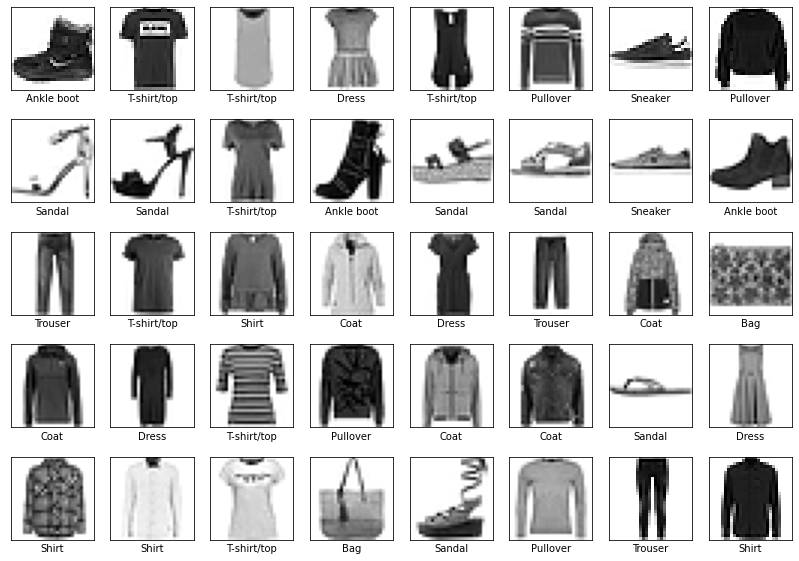

In [6]:
fmnist_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmnist.data.iloc[i].to_numpy().reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(fmnist_names[int(fmnist.target[i])])
plt.show()

#### Use t-SNE, UMAP and LargeVis to project mnist and fmnist data sets into a 2-dimensional space. For LargeVis, you need to create a function that saves the data to the required by LargeVis txt file format, and a function that loads the resulting file. Draw charts for all visualizations.

/Users/pwojtyczek/.conda/envs/visualizing-big-datasets/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pwojtyczek/.conda/envs/visualizing-big-datasets/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


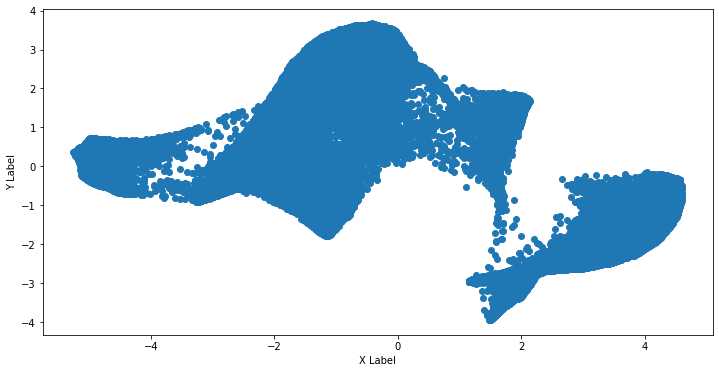

In [35]:
from sklearn.manifold import TSNE
plt.rcParams["figure.figsize"] = [12, 6]

def show_tSNE(points, metric='euclidean', perplexity=30):
    fig, ax = plt.subplots()

    points_transformed = TSNE(n_components=2, metric=metric, n_iter=250, perplexity=perplexity).fit_transform(points)
    points_transformed_t = points_transformed.T

    ax.scatter(points_transformed_t[0], points_transformed_t[1], cmap=plt.cm.coolwarm)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

show_tSNE(fmnist.data)

/Users/pwojtyczek/.conda/envs/visualizing-big-datasets/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pwojtyczek/.conda/envs/visualizing-big-datasets/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


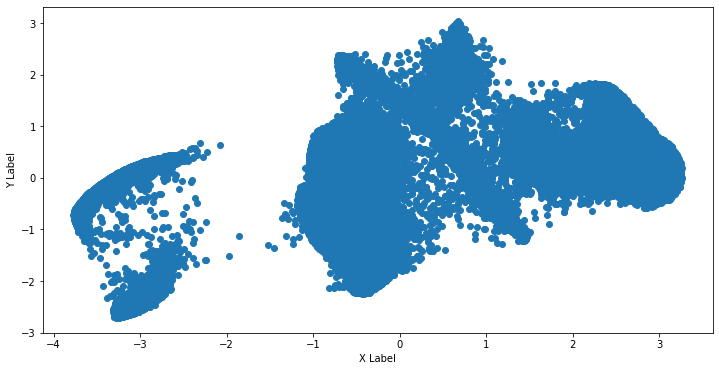

In [36]:
show_tSNE(mnist.data)

<AxesSubplot:>

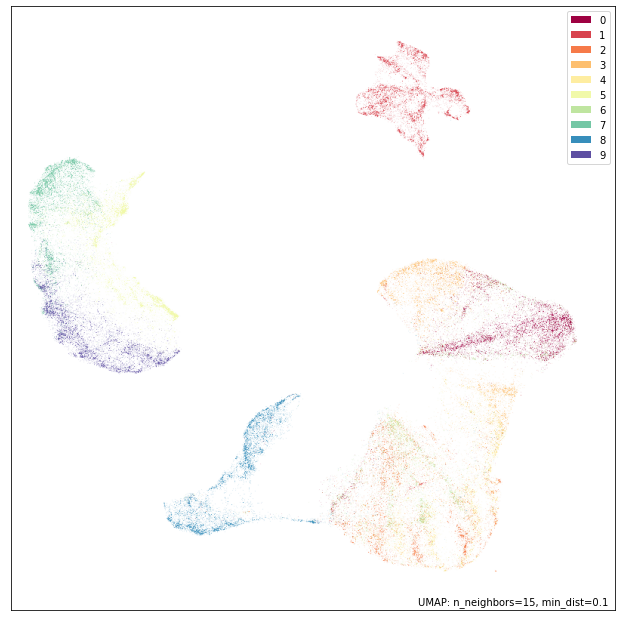

In [40]:
import umap.plot

umap_mapper = umap.UMAP().fit(fmnist.data)
umap.plot.points(umap_mapper, labels=fmnist.target)

<AxesSubplot:>

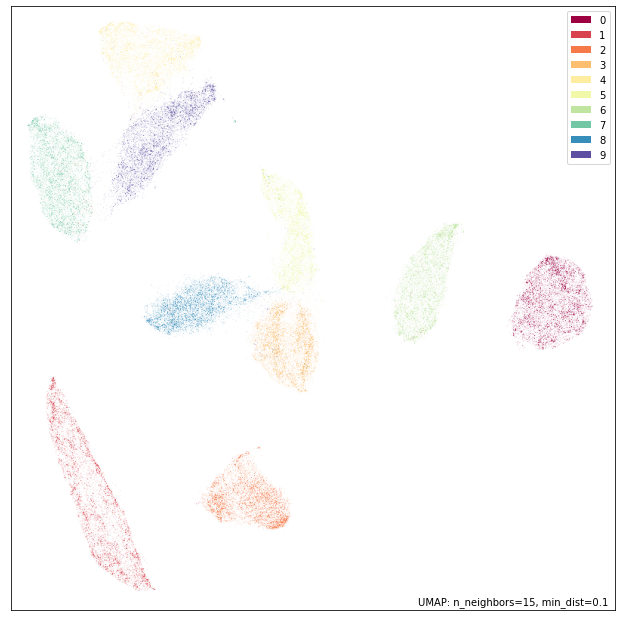

In [42]:
umap_mapper_mnist = umap.UMAP().fit(mnist.data)
umap.plot.points(umap_mapper_mnist, labels=mnist.target)

In [7]:
def save_largevis(data, filename):
    with open(filename, 'w') as f:
        shape = data.shape
        f.write(f'{shape[0]} {shape[1]}\n')
        for i in range(shape[0]):
            row = data.iloc[i].to_numpy()
            vals = []
            for v in row:
                vals.append(f'{v} ')
            f.write(''.join(vals) + '\n')

In [ ]:
save_largevis(mnist.data, 'mnist_data.txt')

In [14]:
save_largevis(fmnist.data, 'fmnist_data.txt')

In [32]:
def load_data(input_filename, label):
    N = M = 0
    all_data = {}
    # label = []
    # we need to parse labels separately
    for i, line in enumerate(open(input_filename)):
        vec = line.strip().split(' ')
        if i == 0:
            N = int(vec[0])
            M = int(vec[1])
        elif i <= N:
            all_data.setdefault(label[i-1], []).append((float(vec[-2]), float(vec[-1])))

    return all_data, label

def show_largevis(all_data):
    colors = plt.cm.rainbow(np.linspace(0, 1, len(all_data)))
    for color, ll in zip(colors, sorted(all_data.keys())):
        x = [t[0] for t in all_data[ll]]
        y = [t[1] for t in all_data[ll]]
        plt.plot(x, y, '.', color = color, markersize = 1)

    plt.show()

In [33]:
mnist_data, mnist_label = load_data('./mnist_output.txt', mnist.target)

In [34]:
mnist_data, mnist_label

({'5': [(-2.594927, 12.59216),
   (-5.387954, 6.632751),
   (-5.621219, 8.059978),
   (-2.953995, 8.535665),
   (-5.23808, 6.262059),
   (-0.285582, 9.021945),
   (-4.198673, 17.997162),
   (-2.48118, 15.443275),
   (-4.585229, 7.058174),
   (-5.980809, 6.938799),
   (-5.001855, 7.638093),
   (-1.154921, 16.571177),
   (-4.710473, 6.796379),
   (-4.075284, 11.441265),
   (-2.030005, 9.445247),
   (-4.948387, 9.836654),
   (0.687777, 14.658237),
   (-5.569227, 9.942559),
   (-0.29992, 15.00547),
   (-5.107127, 9.813912),
   (-3.717274, 17.1709),
   (1.080405, 16.942883),
   (-6.118067, 8.600651),
   (0.895793, 17.584578),
   (1.125908, 16.910303),
   (-1.382458, 11.798779),
   (-0.230879, 13.830456),
   (-5.701039, 9.424308),
   (0.200709, 11.815432),
   (-1.995605, 13.136152),
   (-5.323857, 10.323977),
   (-5.306715, 10.216676),
   (-5.962723, 7.260051),
   (-2.011263, 11.837834),
   (-6.143938, 8.459495),
   (-5.05134, 6.988307),
   (-2.57086, 11.275967),
   (-0.277464, 11.212394),
 

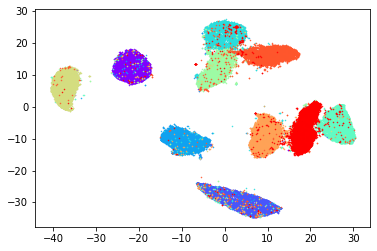

In [35]:
show_largevis(mnist_data)

In [37]:
fmnist_data, fmnist_label = load_data('./fmnist_output.txt', fmnist.target)

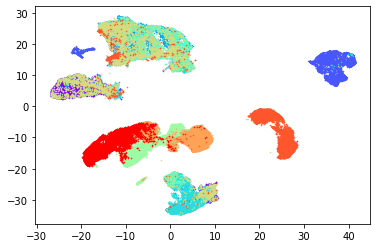

In [38]:
show_largevis(fmnist_data)

#### In order to compare the results of these three methods, calculate for each case the average distance between two points belonging to the same class divided by the average distance between points belonging to 2 different classes

In [69]:
import numba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from scipy.spatial.distance import squareform, pdist
from sklearn.model_selection import train_test_split

markers = ["x", "o", "s", "*", "^", ".", "X"]
colors = ["red", "blue", "green", "brown", "orange", "cyan", "grey", "purple"]


@numba.jit(nopython=True)
def knngain(d_hd, d_ld, labels):
    # Number of data points
    N = d_hd.shape[0]
    N_1 = N - 1
    k_hd = np.zeros(shape=N_1, dtype=np.int64)
    k_ld = np.zeros(shape=N_1, dtype=np.int64)
    # For each data point
    for i in range(N):
        c_i = labels[i]
        di_hd = d_hd[i, :].argsort(kind="mergesort")
        di_ld = d_ld[i, :].argsort(kind="mergesort")
        # Making sure that i is first in di_hd and di_ld
        for arr in [di_hd, di_ld]:
            for idj, j in enumerate(arr):
                if j == i:
                    idi = idj
                    break
            if idi != 0:
                arr[idi] = arr[0]
            arr = arr[1:]
        for k in range(N_1):
            if c_i == labels[di_hd[k]]:
                k_hd[k] += 1
            if c_i == labels[di_ld[k]]:
                k_ld[k] += 1
    # Computing the KNN gain
    gn = (k_ld.cumsum() - k_hd.cumsum()).astype(np.float64) / (
        (1.0 + np.arange(N_1)) * N
    )
    # Returning the KNN gain and its AUC
    return gn, eval_auc(gn)


@numba.jit(nopython=True)
def eval_auc(arr):
    i_all_k = 1.0 / (np.arange(arr.size) + 1.0)
    return np.float64(arr.dot(i_all_k)) / (i_all_k.sum())


@numba.jit(nopython=True)
def eval_rnx(Q):
    N_1 = Q.shape[0]
    N = N_1 + 1
    # Computing Q_NX
    qnxk = np.empty(shape=N_1, dtype=np.float64)
    acc_q = 0.0
    for K in range(N_1):
        acc_q += Q[K, K] + np.sum(Q[K, :K]) + np.sum(Q[:K, K])
        qnxk[K] = acc_q / ((K + 1) * N)
    # Computing R_NX
    arr_K = np.arange(N_1)[1:].astype(np.float64)
    rnxk = (N_1 * qnxk[: N_1 - 1] - arr_K) / (N_1 - arr_K)
    # Returning
    return rnxk


def eval_dr_quality(d_hd, d_ld):
    # Computing the co-ranking matrix of the embedding, and the R_{NX}(K) curve.
    rnxk = eval_rnx(Q=coranking(d_hd=d_hd, d_ld=d_ld))
    # Computing the AUC, and returning.
    return rnxk, eval_auc(rnxk)


def coranking(d_hd, d_ld):
    # Computing the permutations to sort the rows of the distance matrices in HDS and LDS.
    perm_hd = d_hd.argsort(axis=-1, kind="mergesort")
    perm_ld = d_ld.argsort(axis=-1, kind="mergesort")

    N = d_hd.shape[0]
    i = np.arange(N, dtype=np.int64)
    # Computing the ranks in the LDS
    R = np.empty(shape=(N, N), dtype=np.int64)
    for j in range(N):
        R[perm_ld[j, i], j] = i
    # Computing the co-ranking matrix
    Q = np.zeros(shape=(N, N), dtype=np.int64)
    for j in range(N):
        Q[i, R[perm_hd[j, i], j]] += 1
    # Returning
    return Q[1:, 1:]


def viz_qa(
    Ly,
    ymin=None,
    ymax=None,
    Lmarkers=None,
    Lcols=None,
    Lleg=None,
    Lls=None,
    Lmedw=None,
    Lsdots=None,
    lw=2,
    markevery=0.1,
    tit="",
    folder_name="",
    xlabel="",
    ylabel="",
    alpha_plot=0.9,
    alpha_leg=0.8,
    stit=25,
    sax=20,
    sleg=15,
    zleg=1,
    loc_leg="best",
    ncol_leg=1,
    lMticks=10,
    lmticks=5,
    wMticks=2,
    wmticks=1,
    nyMticks=11,
    mymticks=4,
    grid=True,
    grid_ls="solid",
    grid_col="lightgrey",
    grid_alpha=0.7,
    xlog=True,
):
    # Number of curves
    nc = len(Ly)
    # Checking the parameters
    if ymin is None:
        ymin = np.min(np.asarray([arr.min() for arr in Ly]))
    if ymax is None:
        ymax = np.max(np.asarray([arr.max() for arr in Ly]))
    if Lmarkers is None:
        Lmarkers = ["x"] * nc
    if Lcols is None:
        Lcols = ["blue"] * nc
    if Lleg is None:
        Lleg = [None] * nc
        add_leg = False
    else:
        add_leg = True
    if Lls is None:
        Lls = ["solid"] * nc
    if Lmedw is None:
        Lmedw = [float(lw) / 2.0] * nc
    if Lsdots is None:
        Lsdots = [12] * nc

    # Setting the limits of the y-axis
    y_lim = [ymin, ymax]

    # Defining the ticks on the y-axis
    yMticks = np.linspace(
        start=ymin, stop=ymax, num=nyMticks, endpoint=True, retstep=False
    )
    ymticks = np.linspace(
        start=ymin,
        stop=ymax,
        num=1 + mymticks * (nyMticks - 1),
        endpoint=True,
        retstep=False,
    )
    yMticksLab = [int(round(v * 100.0)) / 100.0 for v in yMticks]

    # Initial values for xmin and xmax
    xmin, xmax = 1, -np.inf

    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    if xlog:
        fplot = ax.semilogx
    else:
        fplot = ax.plot

    # Plotting the data
    for id, y in enumerate(Ly):
        x = np.arange(start=1, step=1, stop=y.size + 0.5, dtype=np.int64)
        xmax = max(xmax, x[-1])
        fplot(
            x,
            y,
            label=Lleg[id],
            alpha=alpha_plot,
            color=Lcols[id],
            linestyle=Lls[id],
            lw=lw,
            marker=Lmarkers[id],
            markeredgecolor=Lcols[id],
            markeredgewidth=Lmedw[id],
            markersize=Lsdots[id],
            dash_capstyle="round",
            solid_capstyle="round",
            dash_joinstyle="round",
            solid_joinstyle="round",
            markerfacecolor=Lcols[id],
            markevery=markevery,
        )

    # Setting the limits of the axes
    ax.set_xlim([xmin, xmax])
    ax.set_ylim(y_lim)

    # Setting the major and minor ticks on the y-axis
    ax.set_yticks(yMticks, minor=False)
    ax.set_yticks(ymticks, minor=True)
    ax.set_yticklabels(yMticksLab, minor=False, fontsize=sax)

    # Defining the legend
    if add_leg:
        leg = ax.legend(
            loc=loc_leg,
            fontsize=sleg,
            markerfirst=True,
            fancybox=True,
            framealpha=alpha_leg,
            ncol=ncol_leg,
        )
        if zleg is not None:
            leg.set_zorder(zleg)

    # Setting the size of the ticks labels on the x axis
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(sax)

    # Setting ticks length and width
    ax.tick_params(axis="both", length=lMticks, width=wMticks, which="major")
    ax.tick_params(axis="both", length=lmticks, width=wmticks, which="minor")

    # Setting the positions of the labels
    ax.xaxis.set_tick_params(labelright=False, labelleft=True)
    ax.yaxis.set_tick_params(labelright=False, labelleft=True)

    # Adding the grids
    if grid:
        ax.xaxis.grid(
            True, linestyle=grid_ls, which="major", color=grid_col, alpha=grid_alpha
        )
        ax.yaxis.grid(
            True, linestyle=grid_ls, which="major", color=grid_col, alpha=grid_alpha
        )
    ax.set_axisbelow(True)

    ax.set_title(tit, fontsize=stit)
    ax.set_xlabel(xlabel, fontsize=sax)
    ax.set_ylabel(ylabel, fontsize=sax)
    # plt.tight_layout()

    # Showing the figure
    fig.savefig(
        "/Users/pwojtyczek/Private/visualizing-big-datasets/lab3/results/{}.png".format(
            tit
        ),
        dpi=fig.dpi,
    )

    plt.s

class LocalMetric:
    def __init__(self):
        self.L_rnx = []
        self.L_kg = []
        self.Lleg_rnx = []
        self.Lleg_kg = []
        self.Lls = []
        self.number_of_methods = 0

    def calculate_knn_gain_and_dr_quality(
        self,
        X_lds: np.ndarray,
        X_hds: np.ndarray,
        labels: np.ndarray,
        method_name: str,
    ):

        (
            X_hds_train,
            X_hds_test,
            X_lds_train,
            X_lds_test,
            labels_train,
            labels_test,
        ) = train_test_split(X_hds, X_lds, labels, test_size=0.15)

        print("Calculating d_hd")
        d_hd = squareform(X=pdist(X=X_hds_test, metric="euclidean"), force="tomatrix")

        print(method_name)
        d_ld = squareform(X=pdist(X=X_lds_test, metric="euclidean"), force="tomatrix")
        rnxk, auc_rnx = eval_dr_quality(d_hd=d_hd, d_ld=d_ld)
        kg, auc_kg = knngain(d_hd=d_hd, d_ld=d_ld, labels=labels_test)

        self.L_rnx.append(rnxk)
        self.L_kg.append(kg)
        self.Lleg_rnx.append(
            "{} {}".format(int(round(auc_rnx * 1000)) / 1000.0, method_name)
        )
        self.Lleg_kg.append(
            "{} {}".format(int(round(auc_kg * 1000)) / 1000.0, method_name)
        )
        self.Lls.append("solid")
        self.number_of_methods = self.number_of_methods + 1

    def visualize(self):
        Lmarkers = random.sample(markers, self.number_of_methods)
        Lcols = random.sample(colors, self.number_of_methods)
        Lmedw = [1.0] * self.number_of_methods
        Lsdots = [12] * self.number_of_methods

        viz_qa(
            Ly=self.L_rnx,
            Lmarkers=Lmarkers,
            Lcols=Lcols,
            Lleg=self.Lleg_rnx,
            Lls=self.Lls,
            Lmedw=Lmedw,
            Lsdots=Lsdots,
            tit="DR quality",
            xlabel="Neighborhood size $K$",
            ylabel="$R_{NX}(K)$",
        )

        viz_qa(
            Ly=self.L_kg,
            Lmarkers=Lmarkers,
            Lcols=Lcols,
            Lleg=self.Lleg_kg,
            Lls=self.Lls,
            Lmedw=Lmedw,
            Lsdots=Lsdots,
            tit="KNN gain",
            xlabel="Neighborhood size $K$",
            ylabel="$G_{NN}(K)$",
        )

        print("Finished.")

In [ ]:
local_metrics = LocalMetric()

In [71]:
# embed dataset using some method (low-dimensional space)
X = mnist.data
labels = mnist.target
X_embedded = umap.UMAP().fit_transform(X)

# X.values is original dataset (high-dimensional space)
local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=X.values,
    labels=labels.values.to_numpy(dtype=np.int32),
    method_name="{} {}".format("mnist", "umap"),
)

Calculating d_hd


Exception ignored in: <function BaseContext._insert_global.<locals>.on_disposal at 0x7fe33a1120d0>
Traceback (most recent call last):
  File "/Users/pwojtyczek/.conda/envs/visualizing-big-datasets/lib/python3.9/site-packages/numba/core/typing/context.py", line 474, in on_disposal
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# embed dataset using some method (low-dimensional space)
X = mnist.data
labels = mnist.target
X_embedded = TSNE(n_components=2, metric=metric, n_iter=250, perplexity=perplexity).fit_transform(X)

# X.values is original dataset (high-dimensional space)
local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=X.values,
    labels=labels.values.to_numpy(dtype=np.int32),
    method_name="{} {}".format("mnist", "umap"),
)

In [ ]:
# embed dataset using some method (low-dimensional space)
X = mnist.data
labels = mnist.target
X_embedded = umap.UMAP().fit_transform(X)

# X.values is original dataset (high-dimensional space)
local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=X.values,
    labels=labels.values.to_numpy(dtype=np.int32),
    method_name="{} {}".format("mnist", "umap"),
)

# call local_metrics for each method

# and then do visualize()

In [ ]:
local_metrics.visualize()

In [ ]:
# calculate distances between classes ..
# cdist for calculating distances, compute mean distances ..